1008_미니 프로젝트1_train

In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [51]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [267]:
# 데이터 불러오기
train=pd.read_csv("C://Temp/content/movies_train.csv", parse_dates=[3])
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [268]:
# 결측치 처리 (dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.)
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [269]:
# to_datetime (release_time을 datetime형식으로 변환한다.)
train['release_time']=pd.to_datetime(train['release_time'])

1. 월별 평균 관객수

In [270]:
train['release_month'] = train['release_time'].dt.month
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=True)

,box_off_num
release_month,
4,2.581667e+05
3,2.738874e+05
10,3.859042e+05
11,4.956539e+05
6,5.122865e+05
5,5.756852e+05
2,6.630252e+05
9,7.315286e+05
8,1.029162e+06


<AxesSubplot:xlabel='release_month', ylabel='box_off_num'>

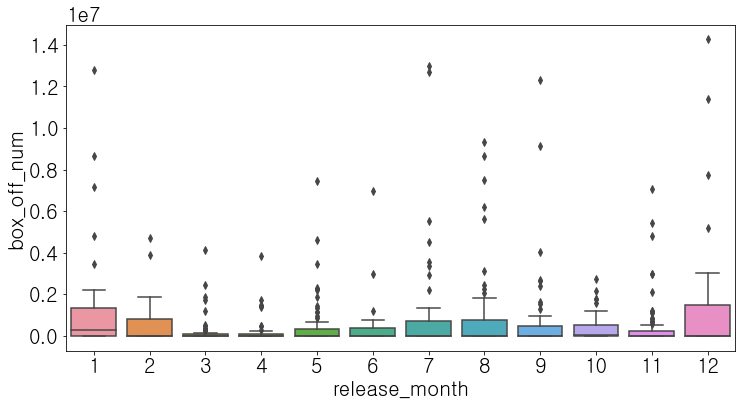

In [271]:
sns.boxplot(x='release_month', y='box_off_num', data=train)

2. 장르별 평균 상영시간

In [272]:
train[['genre', 'time']].groupby('genre').mean().sort_values('time', ascending=False)

,time
genre,
느와르,115.370370
액션,114.464286
서스펜스,112.000000
뮤지컬,107.000000
코미디,105.264151
드라마,104.651584
미스터리,102.588235
SF,101.384615
공포,100.214286


<AxesSubplot:xlabel='genre'>

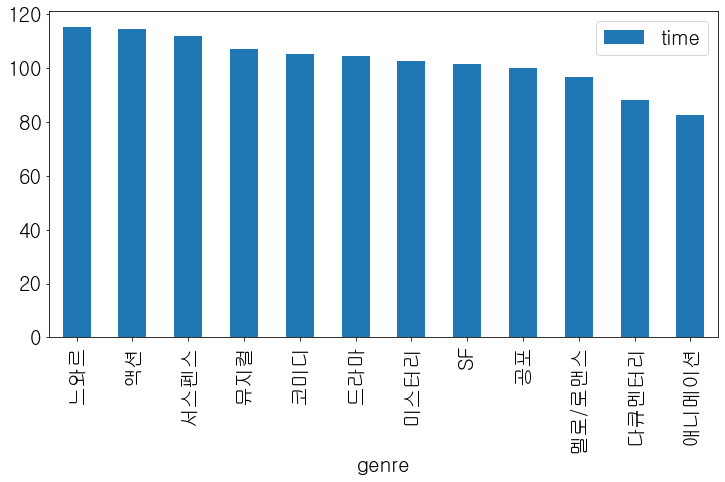

In [273]:
train[['genre','time']].groupby('genre').mean().sort_values('time', ascending=False).plot(kind='bar')

3. 스텝수와 관객수의 상관관계

Text(6.1000000000000085, 0.5, 'box_off_num')

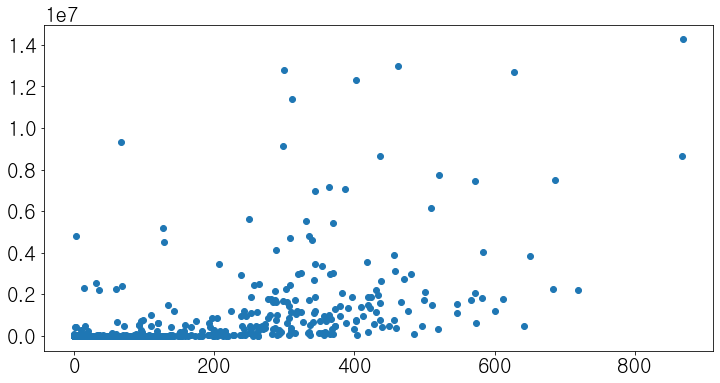

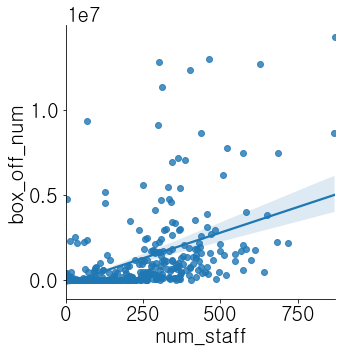

In [274]:
plt.scatter('num_staff', 'box_off_num', data=train)
sns.lmplot('num_staff', 'box_off_num', data=train)
plt.xlabel('num_staff')
plt.ylabel('box_off_num')

4. 상영등급별 장르의 순위

In [275]:
train['screening_rat'].value_counts(ascending=False)

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

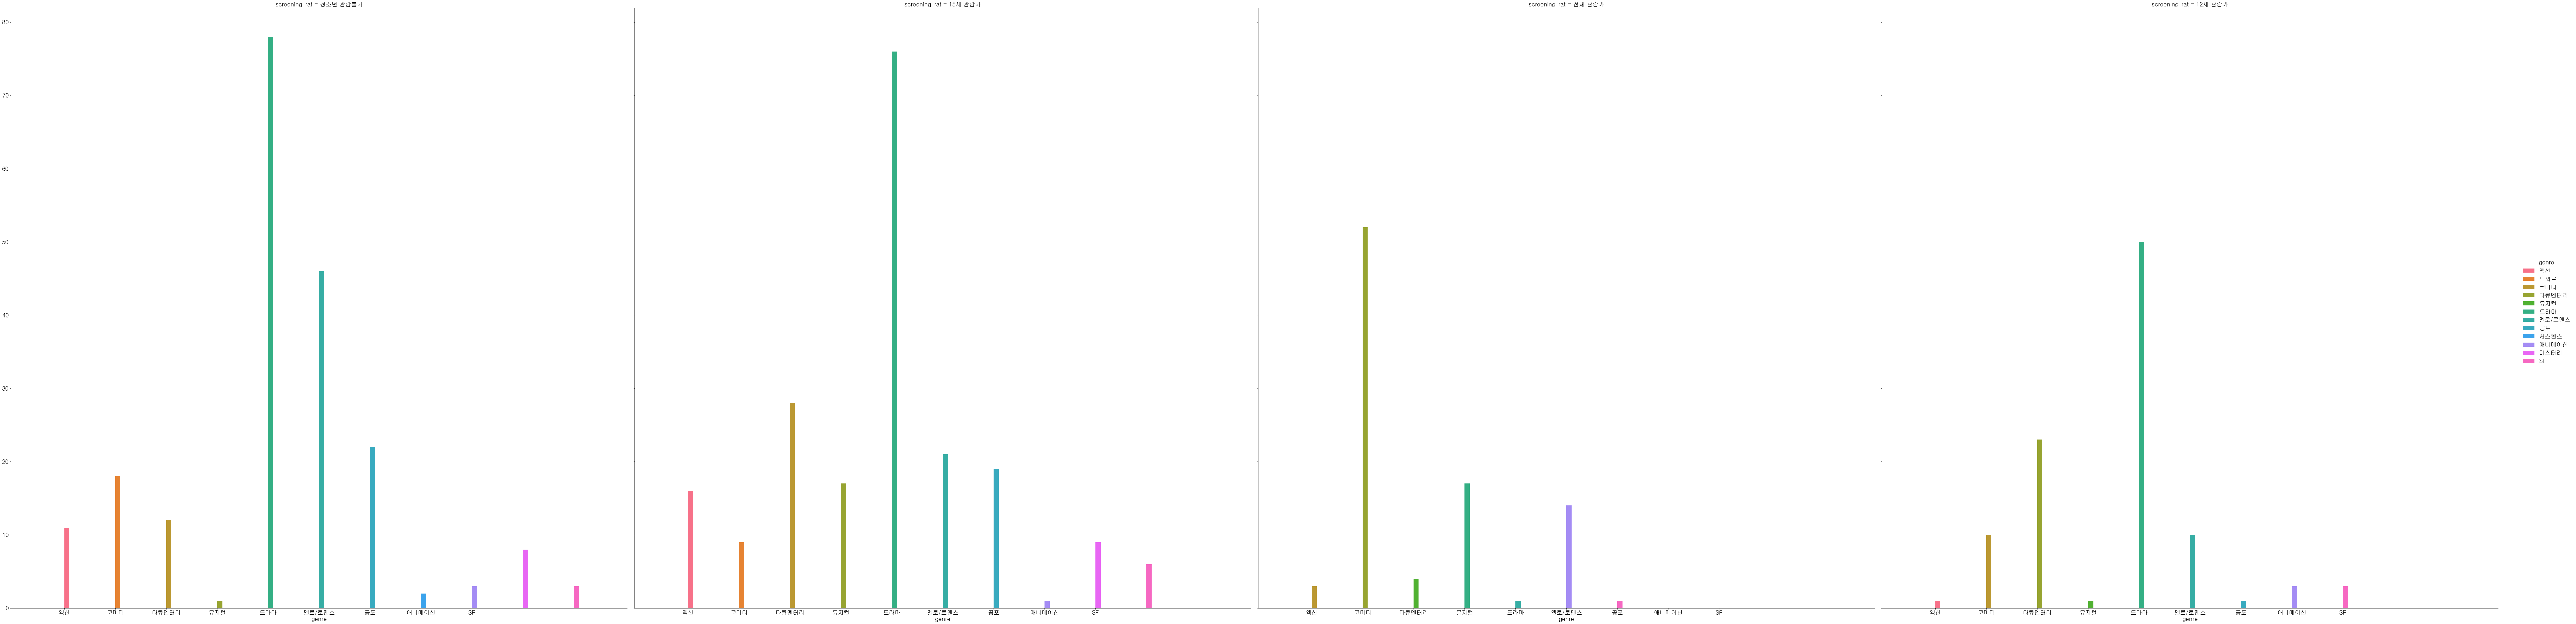

In [276]:
g = sns.FacetGrid(train, col='screening_rat', hue='genre', size=30)
g.map(plt.hist, 'genre')
g.add_legend()

#그래프 더블클릭하면 커짐

5. 평균 스텝의 수가 가장 많은 배급사 top 10

In [307]:
dis_staff = train.groupby('distributor').mean().sort_values(by='num_staff', ascending=False).head(10)
dis_staff = dis_staff.reset_index()
dis_staff

,distributor,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_month
0,주머니필름,113.000000,0.000000e+00,0.000000,477.000000,7.000000,1.201944e+06,8.000000
1,(주)아이필름코퍼레이션,121.000000,7.250000e+01,2.000000,458.000000,3.000000,3.117859e+06,8.000000
2,스튜디오 블루,120.000000,2.038000e+04,1.000000,436.000000,2.000000,7.716990e+05,8.000000
3,SK텔레콤(주),111.000000,0.000000e+00,0.000000,410.000000,4.000000,1.383867e+06,4.000000
4,KT,111.666667,1.449213e+06,1.000000,364.000000,2.333333,2.692783e+05,7.333333
5,(주)쇼박스,126.538462,1.370236e+06,1.807692,360.384615,3.923077,3.386656e+06,7.076923
6,CGV 아트하우스,108.000000,5.408760e+05,0.500000,342.500000,3.500000,6.839770e+05,11.000000
7,전주국제영화제,118.000000,1.381900e+05,1.000000,336.000000,5.000000,5.726100e+04,3.000000
8,CJ E&M Pictures,115.000000,4.111671e+06,0.500000,335.000000,8.000000,4.122337e+06,5.500000
9,시너지,111.900000,9.811153e+05,1.400000,333.100000,4.600000,4.566636e+05,7.500000


<AxesSubplot:xlabel='distributor'>

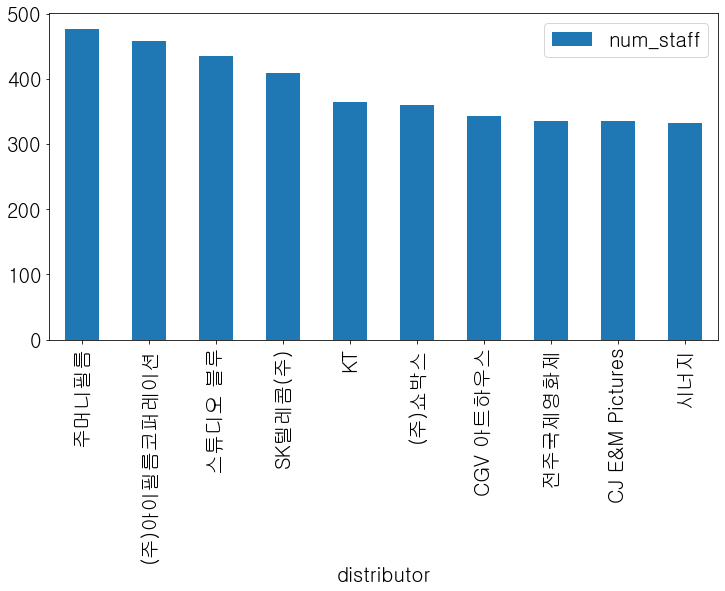

In [308]:
dis_staff[['distributor','num_staff']].groupby('distributor').mean().sort_values('num_staff', ascending=False).plot(kind='bar')